In [1]:
using BenchmarkTools: @btime

## Hermite Polynomials

In [ ]:
struct HermiteCoeffs
    factors::Vector{Float64}
    start::Float64

    function HermiteCoeffs(n)
        factors = Float64[]
        
        for m in n÷2:-1:0
            factor = factorial(n) * (-1)^m / (factorial(m) * factorial(n - 2m)) * 2^(n - 2m)
            push!(factors, factor)
        end
        return new(factors, n % 2)
    end
end

In [ ]:
he = HermiteCoeffs(20);

In [ ]:
function hermite(x, he)
    result = zero(x)
    x2 = x^2
    xm = x^he.start
    for factor in he.factors
        result += factor * xm
        xm *= x2
    end
    return result
end

In [ ]:
@btime hermite(3.0, he)

## HO Basis functions

In [8]:
struct HO
    n::Float64
    factors::Vector{Float64}
    parity::Float64
    ω::Float64

    function HO(n, ω)
        factors = Float64[]
        
        scaling = sqrt( factorial(n) / 2^n ) * (ω / π)^0.25
        ξfac = √ω
        
        for m in n÷2:-1:0
            factor = scaling * (-1)^m / (factorial(m) * factorial(n - 2m)) * 2^(n - 2m) * ξfac^(n - 2m)
            push!(factors, factor)
        end
        return new(n, factors, n % 2, ω)
    end
end

In [44]:
function ho(x, ho)
    result = zero(x)
    x2 = x^2
    xm = (x * ho.parity) + (1 - ho.parity) # xm = 1 if parity == 1 else xm = x
    for factor in ho.factors
        result += factor * xm
        xm *= x2
    end
    result = result * exp(-ho.ω * x^2 / 2)
    return result
end

ho (generic function with 1 method)

In [15]:
function potential(x, basis)
    return 0.5 * basis.ω^2 * x^2
end

potential (generic function with 1 method)

In [16]:
function E_n(basis)
    return (basis.n + 1/2) * basis.ω
end

E_n (generic function with 1 method)

In [45]:
basis = HO(3, 0.25);

In [46]:
@btime ho(0.3, basis)

  29.518 ns (1 allocation: 16 bytes)


-0.13440017617014235

In [17]:
x = [i for i in -10:20/2000:10];

In [18]:
basisfuncs = [HO(i, 0.25) for i in 0:9];

In [48]:
@btime ho(0.3, basisfuncs[4])

  49.089 ns (2 allocations: 64 bytes)


-0.13440017617014235

In [19]:
import PyPlot as plt

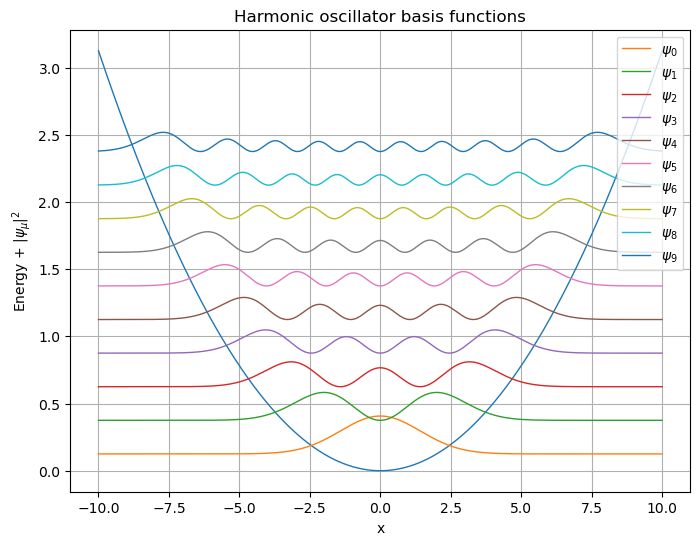

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(x, potential.(x, (basisfuncs[1],)), lw = 1)
for n in 1:10
    basis = basisfuncs[n]
    plt.plot(x, E_n(basis) .+ ho.(x, (basis,)).^2, lw = 1, label = "\$\\psi_{$(n-1)}\$")
end
plt.xlabel("x")
plt.ylabel("Energy + \$|ψ_{μ}|^2\$")
plt.title("Harmonic oscillator basis functions")
plt.grid()
plt.legend();